In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:

allfiles = [i for i in os.listdir() if "Activity" in i]

ACase = []

Labels = []

for j in range(len(allfiles)):
    
    Labels.append(allfiles[j].split("_")[1])
    
    files = os.listdir(allfiles[j])

    files = sorted(files,key= lambda x: np.float32(x.split("_")[3].split("tmax")[0]))
    
    ww = np.float32([np.float32(i.split("_")[3].split("tmax")[0]) for i in files])

    F = []
    
    Aa = []
    
    for i in range(len(files)):

        Act = pd.read_csv(allfiles[j]+"/"+files[i]).iloc[:,0].values

        F.append(np.sum(Act)*1000/len(Act))
        
        Aa.append(Act)
    
    ACase.append(Aa)


AMPA : 0.0005921428717910931
NMDA : 0.0005299999908224458
Both : 0.0002878571415239656


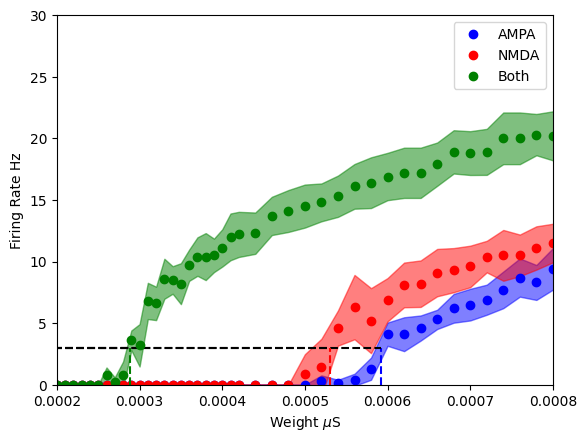

In [7]:

cl = ["b","r","g"]

TargetFiringRate = 3

for k in range(len(allfiles)):

    nn = len(ACase[k])
    
    Aact = np.zeros([nn,10],dtype=np.float32)

    nt = 1000

    for j in range(nn):

        for i in range(10):

            Aact[j,i] = np.sum(ACase[k][j][nt*i:nt*(i+1)])

    Amean = np.mean(Aact,axis=1)

    Astd = np.std(Aact,axis=1)

    iix,ifx = np.where(Amean<TargetFiringRate)[0][-1],np.where(Amean>=TargetFiringRate)[0][0]

    m = (Amean[ifx]-Amean[iix])/(ww[ifx]-ww[iix])
    
    wx = ww[iix]+(TargetFiringRate-Amean[iix])/m
    
    print(Labels[k],":",wx)

    plt.plot(ww,Amean[:len(ww)],'o',color=cl[k],label=Labels[k])

    plt.fill_between(ww,Amean[:len(ww)]-Astd[:len(ww)],Amean[:len(ww)]+Astd[:len(ww)],color=cl[k],alpha=0.5)
    
    plt.plot(np.ones(2)*wx,[0,TargetFiringRate],"--",color=cl[k])
    
    plt.plot([0,wx],[TargetFiringRate,TargetFiringRate],linestyle="--",color='k')

plt.ylim(0,30)
plt.xlim(0.0002,.0008)

plt.legend()

plt.xlabel(r"Weight $\mu$S")

plt.ylabel("Firing Rate Hz")

plt.savefig("Weight_Firing_rate.png",dpi=400)
